In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

import copy

sys.path.insert(1, '../metadl/baselines/sentive_ai')
from sentive.sentive_vision_network import sentive_vision_network

from sentive.sentive_brain import sentive_brain

root_ep = 'episode_'
suf_eptest = '_1.csv'
root_test= 'test_'

episode = np.zeros([1, 5, 28, 28, 2])
test = np.zeros([5, 28, 28, 2])
for i in range(5):
    episode[0][i][:,:,0] = np.loadtxt(root_ep+str(i)+suf_eptest)
    episode[0][i][:,:,1] = np.loadtxt(root_ep+str(i)+suf_eptest)

    test[i][:,:,0] = np.loadtxt(root_test+str(i)+suf_eptest)
    test[i][:,:,1] = np.loadtxt(root_test+str(i)+suf_eptest)



$ >********* network: 0
nombre de neurones taille 1: 56


______________________________________________________________________________________
nrn2 id 57
new_x 9
new_y 7
central_pixel_id 1
nrn_pxl_map[new_y][x] 1.0
tmp_sub_pxl_map :
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 2. 3.]]
tmp_list_sub_pxl [0, 2, 3]
nrn_pxl_id 2
nrn_pxl id & weight : 2 0.9633017778396606
nrn_pxl_id 3
nrn_pxl id & weight : 3 0.9887948036193848
x_composant [0.0, 0.9887948036193848]
y_composant [0.9633017778396606, 0.9887948036193848]
vecteur orientation sans shift: 0.506529652790199 1.0
PROCHAIN NEURONE: [new_x: 10 , new_y: 8 ]
PROCHAIN NEURONE SANS CHANGEMENT: [new_x: 10 , new_y: 8 ]
mtrx_weights_pxl:
 [[0.         0.         0.        ]
 [0.         0.94592118 0.        ]
 [0.         0.96330178 0.9887948 ]]
neurone a supprimer dans la matrice : x : 2 y: 2
mtrx_weights_pxl:
 [[0.         0.         0.        ]
 [0.         0.94592118 0.        ]
 [0.         0.96330178 0.        ]]
barycentre [1.         1.50455175]
##

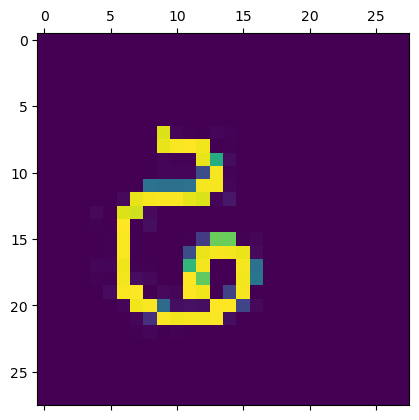

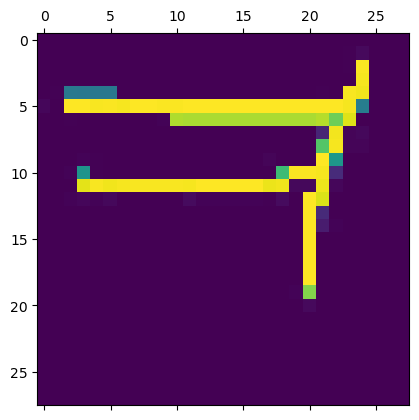

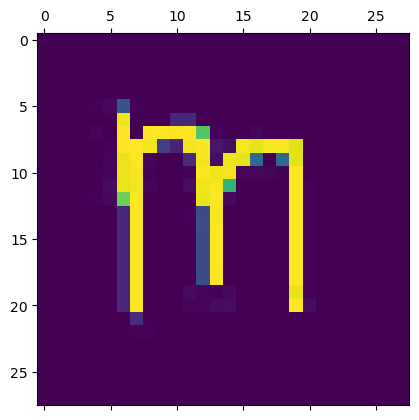

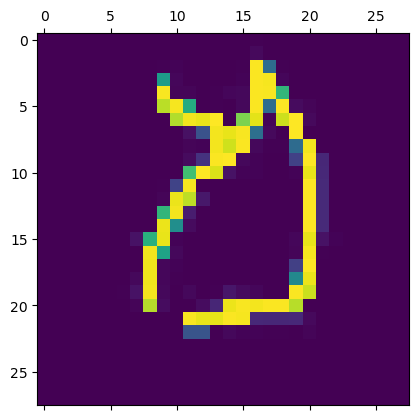

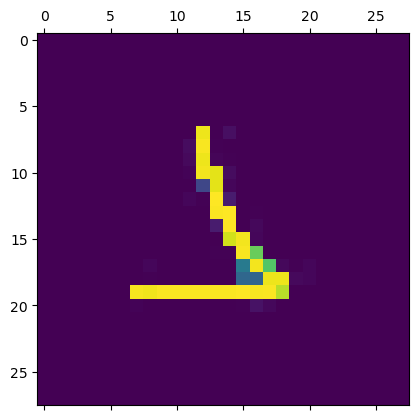

In [2]:
sbrain = sentive_brain(episode,5)

In [3]:
# to be removed                                                    
char_id = 0
self = sbrain.nnet[char_id]        
# to be removed 


nombre de neurones taille 1: 57


______________________________________________________________________________________
nrn2 id 58
new_x 8
new_y 5
central_pixel_id 1
nrn_pxl_map[new_y][x] 1.0
tmp_sub_pxl_map :
 [[0. 0. 0.]
 [0. 0. 2.]
 [0. 6. 0.]]
tmp_list_sub_pxl [0, 2, 6]
nrn_pxl_id 2
nrn_pxl id & weight : 2 0.9952553510665894
nrn_pxl_id 6
nrn_pxl id & weight : 6 0.8775280714035034
x_composant [0.9952553510665894, 0.0]
y_composant [0.0, 0.8775280714035034]
vecteur orientation sans shift: 0.5314310982921374 0.4685689017078626
PROCHAIN NEURONE: [new_x: 9 , new_y: 5 ]
PROCHAIN NEURONE SANS CHANGEMENT: [new_x: 9 , new_y: 5 ]
mtrx_weights_pxl:
 [[0.         0.         0.        ]
 [0.         0.9876489  0.99525535]
 [0.         0.87752807 0.        ]]
neurone a supprimer dans la matrice : x : 2 y: 1
mtrx_weights_pxl:
 [[0.         0.         0.        ]
 [0.         0.9876489  0.        ]
 [0.         0.87752807 0.        ]]
barycentre [1.         1.47047979]
############################

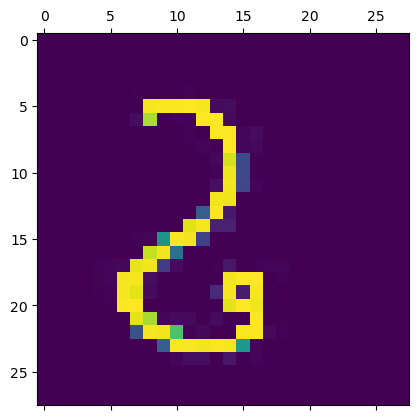

In [4]:
# to be removed : header of the function
input_network_to_compare = sentive_vision_network(test[0])
# input_network_to_compare = copy.deepcopy(test_net)
input_network_to_compare.run_layers()

In [58]:
def get_single_curve_activation(nrn3_to_compare, nrn3_curve_id, propagated_value, nrn3_total_length=1, compared_total_length=1):
    try:
        _ = nrn3_curve_id.neuron["_id"]
        nrn3 = nrn3_curve_id.neuron
    except:
        nrn3 = self.nrn_tls.get_neuron_from_id(nrn3_curve_id)

    # print("nrn3",nrn3)
    nrn3_to_compare = nrn3_to_compare.neuron
    # print("nrn3_to_compare",nrn3_to_compare)
    
    # calculer l'écart entre les 2 angles
    ecart_angle = np.power(nrn3_to_compare["meta"]["curve"]["angle"] - nrn3["meta"]["curve"]["angle"], 2)
    ecart_acceleration = np.power(nrn3_to_compare["meta"]["curve"]["acceleration"] - nrn3["meta"]["curve"]["acceleration"], 2)
    distance = np.sqrt(ecart_angle + ecart_acceleration*200)
    score_angle = -0.6 * distance + 1
    if score_angle < 0:
        score_angle = 0
    # print("distance",distance, "(score angle", score_angle,")")
    # ecart_angle = np.sqrt(ecart_angle)
    # calculer le score
    # if ecart_angle > np.pi/4:
    #     score_angle = 0
    # else:
    #     score_angle = np.abs(1-ecart_angle*4/np.pi)

    # comparer les longueurs des 2 nrn3 courbe
    ecart_ratio_length = np.abs((nrn3_to_compare["meta"]["curve"]["nb_iteration"]/compared_total_length)-(nrn3["meta"]["curve"]["nb_iteration"]/nrn3_total_length))
    if ecart_ratio_length > 0.5:
        score_length = 0
    else:
        score_length = 1 - 2 * ecart_ratio_length
    # print("score length:", score_length, "(ecart_ratio_length", ecart_ratio_length, ")")

    # comparer les orientations des basis vector 
    angle = self.nrn_tls.calc_angle(nrn3["meta"]["curve"]["basis_vector"], nrn3_to_compare["meta"]["curve"]["basis_vector"])
    score_basis_vector = np.abs(1-angle*2/np.pi) 

    # calculer la distance entre les deux cg
    # print("input_curve_nrn", nrn3_to_compare["_id"], "local_curve_nrn", nrn3["_id"])
    # print("input_curve_nrn", nrn3_to_compare["meta"]["curve"]["offset_cg"], "local_curve_nrn", nrn3["meta"]["curve"]["offset_cg"])
    distance_cg = np.sqrt(np.power(nrn3_to_compare["meta"]["curve"]["offset_cg"]["x"]-nrn3["meta"]["curve"]["offset_cg"]["x"],2)+np.power(nrn3_to_compare["meta"]["curve"]["offset_cg"]["y"]-nrn3["meta"]["curve"]["offset_cg"]["y"],2))
    if distance_cg > 15:
        score_cg = 0
    else:
        score_cg = 1 - distance_cg/15
    # print("distance_cg", distance_cg , "(score_cg", score_cg, ")")
    
    score = 0.4 * score_angle + 0.2 * score_length + 0.2 * score_basis_vector + 0.2 * score_cg
    if len(nrn3["DbConnectivity"]["anti_lateral"])> 0:
        score = 0.75 * score + 0.25 * propagated_value

    return score

In [6]:
def get_lateral_nb_previous_nrns(lst_curve_nrns):
    lst_output = []
    for i, nrn in enumerate(lst_curve_nrns):
        if len(nrn.neuron["DbConnectivity"]["anti_lateral"])> 0:
            lst_output.append(1+lst_output[i-1])
        else:
            lst_output.append(0)
    return lst_output

In [61]:
len(test)
lst_local_curve_nrns, local_curve_total_length = self.get_curve_nrn_list()
lst_input_curve_nrns, input_curve_total_length = input_network_to_compare.get_curve_nrn_list()
tmp_results = []
# calculer le centre de gravité de la courbe à partir de meta.pixels_matrix
for input_curve_nrn in lst_input_curve_nrns:
    nrn = input_curve_nrn.neuron
    if len(nrn["meta"]["curve"]["pixels_matrix"])<1:
        nrn["meta"]["curve"]["pixels_matrix"] = input_network_to_compare.nrn_tls.get_list_pixels_coord(nrn["_id"])
        # print("input nrn", nrn["_id"], "pixels_matrix:", nrn["meta"]["curve"]["pixels_matrix"])
    # calculer le centre de gravité de la courbe à partir de meta.pixels_matrix
    list_x = []
    list_y = []
    for coord in nrn["meta"]["curve"]["pixels_matrix"]:
        list_x.append(coord["x"])
        list_y.append(coord["y"])
    nrn["meta"]["curve"]["cg"] = {
        "x":np.mean(list_x),
        "y":np.mean(list_y)
    }
    nrn["meta"]["curve"]["offset_cg"] = {
        "x":nrn["meta"]["curve"]["cg"]["x"]-input_network_to_compare.glbl_prm["cg"]["x"],
        "y":nrn["meta"]["curve"]["cg"]["y"]-input_network_to_compare.glbl_prm["cg"]["y"]
    }

for local_curve_nrn in lst_local_curve_nrns:
    nrn = local_curve_nrn.neuron
    if len(nrn["meta"]["curve"]["pixels_matrix"])<1:
        nrn["meta"]["curve"]["pixels_matrix"] = self.nrn_tls.get_list_pixels_coord(nrn["_id"])
        # print("local nrn", nrn["_id"], "pixels_matrix:", nrn["meta"]["curve"]["pixels_matrix"])
    # calculer le centre de gravité de la courbe à partir de meta.pixels_matrix
    list_x = []
    list_y = []
    for coord in nrn["meta"]["curve"]["pixels_matrix"]:
        list_x.append(coord["x"])
        list_y.append(coord["y"])
    nrn["meta"]["curve"]["cg"] = {
        "x":np.mean(list_x),
        "y":np.mean(list_y)
    }
    nrn["meta"]["curve"]["offset_cg"] = {
        "x":nrn["meta"]["curve"]["cg"]["x"]-self.glbl_prm["cg"]["x"],
        "y":nrn["meta"]["curve"]["cg"]["y"]-self.glbl_prm["cg"]["y"]
    }


# calculer les scores
lst_local_sequence = get_lateral_nb_previous_nrns(lst_local_curve_nrns)
activated_sequence = np.zeros(len(lst_local_sequence))
final_results = np.zeros(len(lst_local_sequence))
for input_curve_nrn in lst_input_curve_nrns:
    for tmp_counter, local_curve_nrn in enumerate(lst_local_curve_nrns):
        if lst_local_sequence[tmp_counter]>0:
            tmp_propagated_value = activated_sequence[tmp_counter]/lst_local_sequence[tmp_counter]
        else:
            tmp_propagated_value = 0
        # print(tmp_propagated_value)
        tmp_results.append(get_single_curve_activation(input_curve_nrn, local_curve_nrn, tmp_propagated_value, local_curve_total_length, input_curve_total_length))
        # the winner is the one with the highest score
        # the winner takes it all
    id_winner = np.argmax(tmp_results)
    print(tmp_results)
    print("winner:", id_winner, "score:", tmp_results[id_winner], "nrn3", lst_local_curve_nrns[id_winner].neuron["_id"])
    final_results[id_winner] += tmp_results[id_winner] * 0.5*((input_curve_nrn.neuron["meta"]["curve"]["nb_iteration"]/input_curve_total_length)+(lst_local_curve_nrns[id_winner].neuron["meta"]["curve"]["nb_iteration"]/local_curve_total_length))


    # propagate the activity
    bool_propagated_activity = False
    # print("Before activated_sequence", activated_sequence)
    new_max_propagated_value = 0
    for id in range(len(activated_sequence)):
        if id==id_winner:
            new_max_propagated_value = activated_sequence[id] + 1
            activated_sequence[id] = 0
            # check if winner has a lateral connexion
            if len(lst_local_curve_nrns[id_winner].neuron["DbConnectivity"]["lateral_connexion"])>0:
                bool_propagated_activity = True
        elif bool_propagated_activity:
            activated_sequence[id]+= 1
            if activated_sequence[id] > new_max_propagated_value:
                activated_sequence[id] = new_max_propagated_value
            if len(lst_local_curve_nrns[id].neuron["DbConnectivity"]["lateral_connexion"])>0:
                bool_propagated_activity = True
            else:
                bool_propagated_activity = False
        else:
            activated_sequence[id] = 0
        
    print("After activated_sequence", activated_sequence)
    tmp_results = []

print("final_results", final_results)
print("result", np.sum(final_results))


[0.8056996165213794, 0.6929783789444285, 0.64157439020579, 0.40414019881889957, 0.3776284328022044]
winner: 0 score: 0.8056996165213794 nrn3 58
After activated_sequence [0. 0. 0. 0. 0.]
[0.4907707676931643, 0.8144002318236789, 0.688478409978576, 0.30311555015561725, 0.4101138210439754]
winner: 1 score: 0.8144002318236789 nrn3 62
After activated_sequence [0. 0. 1. 1. 1.]
[0.6969147527269064, 0.6789833932180593, 0.9436669311730824, 0.6253613208211194, 0.6019021415530242]
winner: 2 score: 0.9436669311730824 nrn3 75
After activated_sequence [0. 0. 0. 2. 2.]
[0.48650473283067736, 0.7132893427207957, 0.7600485884605763, 0.6402703114306749, 0.621652331965233]
winner: 2 score: 0.7600485884605763 nrn3 75
After activated_sequence [0. 0. 0. 1. 1.]
final_results [0.07041408 0.28435571 0.56247901 0.         0.        ]
result 0.9172488018883664


In [41]:
self.glbl_prm["cg"]

{'x': 10.678571428571429, 'y': 15.089285714285714}

In [9]:
input_network_to_compare.glbl_prm

{'cg': {'x': 11.31578947368421, 'y': 15.789473684210526},
 'u_axis': {'x': 0.018093350505783062, 'y': -0.9998363019352096},
 'v_axis': {'x': -0.9998363019352096, 'y': -0.018093350505783062}}

In [45]:
self.nrn_tls.get_list_pixels_coord(58)

[{'x': 9, 'y': 7}, {'x': 10, 'y': 8}]

In [10]:
x = [0]
y = []
h = []
cumsum_x = 0
last_angle = 0
for nrn in sbrain.nnet[char_id].nrn_tls.lst_nrns:
    if nrn.neuron["type"] == "sentive_vision_curve":
        cumsum_x += nrn.neuron["meta"]["curve"]["nb_iteration"]
        x.append(cumsum_x)
        x.append(cumsum_x)
        print(nrn.neuron["_id"], ":", nrn.neuron["meta"]["curve"]["starting_point"], " *", nrn.neuron["meta"]["curve"]["nb_iteration"],"* ",cumsum_x,",",  nrn.neuron["meta"]["curve"]["angle"], nrn.neuron["meta"]["curve"]["acceleration"])
        last_angle = nrn.neuron["meta"]["curve"]["angle"]
        y.append(last_angle)
        y.append(last_angle)
        tmp_h = np.ones( nrn.neuron["meta"]["curve"]["nb_iteration"]) * last_angle
        h.extend(tmp_h)
y.append(last_angle)        
print("_______________________________________________________")
for nrn in sbrain.nnet[char_id].nrn_tls.lst_nrns:
    if nrn.neuron["type"] == "sentive_vision_line":
        print(nrn.neuron["_id"],  ":", nrn.neuron["meta"]["line"]["starting_point"] , " *", nrn.neuron["meta"]["line"]["nb_iteration"],"* ", )

58 : {'x': 9, 'y': 7}  * 2 *  2 , -1.1104675434547855 0.0
62 : {'x': 11, 'y': 8}  * 9 *  11 , 0.4295161186360927 -2.2701239672769e-10
75 : {'x': 8, 'y': 11}  * 16 *  27 , -0.2290243547545857 0.012114647062218696
95 : {'x': 14, 'y': 20}  * 6 *  33 , -0.6066330038438257 0.0
102 : {'x': 11, 'y': 17}  * 2 *  35 , 1.1915383955343106 0.0
_______________________________________________________
59 : {'x': 9, 'y': 7}  * 7 * 
63 : {'x': 11, 'y': 8}  * 3 * 
69 : {'x': 13, 'y': 11}  * 9 * 
76 : {'x': 8, 'y': 11}  * 8 * 
88 : {'x': 8, 'y': 20}  * 5 * 


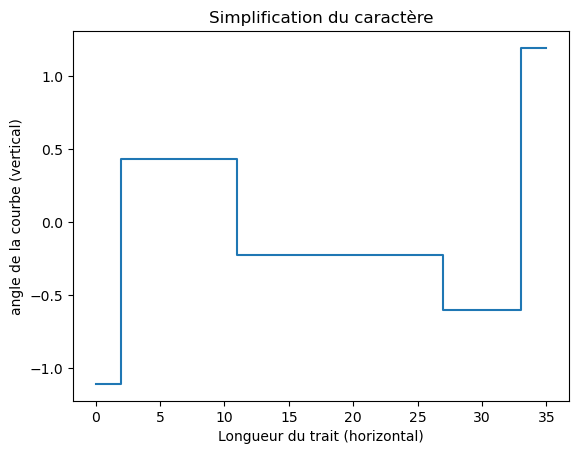

In [11]:
# tracer un graphique en escalier avec les points fournis
plt.plot(x, y, drawstyle='steps-post')

# ajouter des titres et des étiquettes d'axes
plt.title('Simplification du caractère')
plt.xlabel('Longueur du trait (horizontal)')
plt.ylabel('angle de la courbe (vertical)')

# afficher le graphique
plt.show()


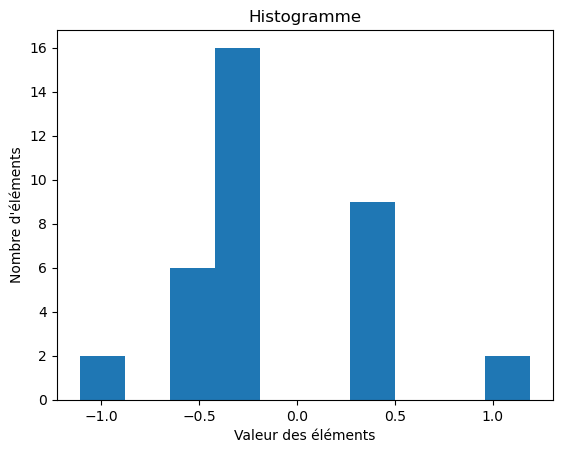

In [12]:
# tracer un histogramme avec les données fournies
plt.hist(h, bins=10)

# ajouter des titres et des étiquettes d'axes
plt.title('Histogramme')
plt.xlabel('Valeur des éléments')
plt.ylabel('Nombre d\'éléments')

# afficher le graphique
plt.show()


59 : {'x': 8, 'y': 5}  * 4 *  4 , -0.3201326952398892 0.0
65 : {'x': 12, 'y': 5}  * 15 *  19 , 0.22089173542741913 -0.019016253215721323
84 : {'x': 14, 'y': 18}  * 2 *  21 , -0.2173817387079488 0.0
88 : {'x': 6, 'y': 20}  * 13 *  34 , -1.4980281131695715e-06 -0.01897704110851215
_______________________________________________________
60 : {'x': 8, 'y': 5}  * 4 * 
66 : {'x': 12, 'y': 5}  * 3 * 
75 : {'x': 14, 'y': 12}  * 7 * 
85 : {'x': 14, 'y': 18}  * 2 * 
89 : {'x': 6, 'y': 20}  * 6 * 
99 : {'x': 12, 'y': 23}  * 6 * 


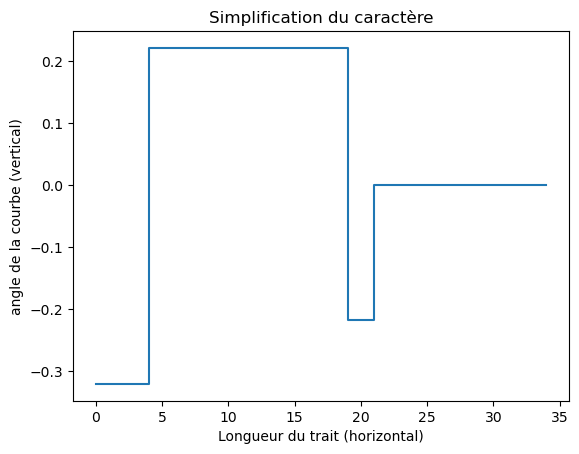

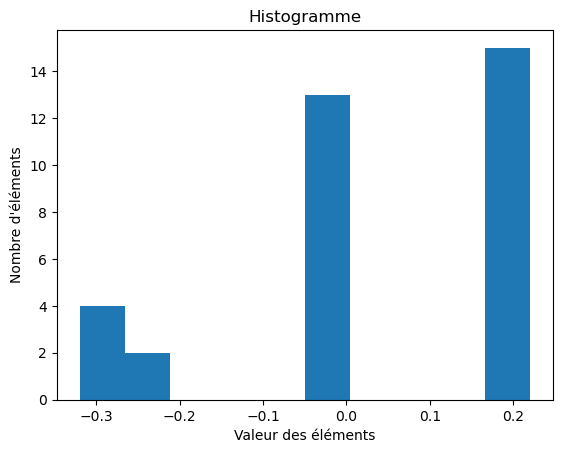

In [13]:
x = [0]
y = []
h = []
cumsum_x = 0
last_angle = 0
for nrn in input_network_to_compare.nrn_tls.lst_nrns:
    if nrn.neuron["type"] == "sentive_vision_curve":
        cumsum_x += nrn.neuron["meta"]["curve"]["nb_iteration"]
        x.append(cumsum_x)
        x.append(cumsum_x)
        print(nrn.neuron["_id"], ":", nrn.neuron["meta"]["curve"]["starting_point"], " *", nrn.neuron["meta"]["curve"]["nb_iteration"],"* ",cumsum_x,",",  nrn.neuron["meta"]["curve"]["angle"], nrn.neuron["meta"]["curve"]["acceleration"])
        last_angle = nrn.neuron["meta"]["curve"]["angle"]
        y.append(last_angle)
        y.append(last_angle)
        tmp_h = np.ones( nrn.neuron["meta"]["curve"]["nb_iteration"]) * last_angle
        h.extend(tmp_h)
y.append(last_angle)        
print("_______________________________________________________")
for nrn in input_network_to_compare.nrn_tls.lst_nrns:
    if nrn.neuron["type"] == "sentive_vision_line":
        print(nrn.neuron["_id"],  ":", nrn.neuron["meta"]["line"]["starting_point"] , " *", nrn.neuron["meta"]["line"]["nb_iteration"],"* ", )

# tracer un graphique en escalier avec les points fournis
plt.plot(x, y, drawstyle='steps-post')

# ajouter des titres et des étiquettes d'axes
plt.title('Simplification du caractère')
plt.xlabel('Longueur du trait (horizontal)')
plt.ylabel('angle de la courbe (vertical)')

# afficher le graphique
plt.show()

# tracer un histogramme avec les données fournies
plt.hist(h, bins=10)

# ajouter des titres et des étiquettes d'axes
plt.title('Histogramme')
plt.xlabel('Valeur des éléments')
plt.ylabel('Nombre d\'éléments')

# afficher le graphique
plt.show()

In [14]:
sbrain.nnet[char_id].nrn_tls.get_neuron_from_id(75)

{'_id': 75,
 'schema_version': 2,
 'type': 'sentive_vision_curve',
 'layer_id': 2,
 'DbConnectivity': {'pre_synaptique': [74,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   89,
   90,
   91,
   92,
   93],
  'post_synaptique': [],
  'lateral_connexion': [95],
  'anti_lateral': [62],
  'anti_post_synaptique': [76, 88],
  'weights': {}},
 'meta': {'threshold': 0.7,
  'pending_nb_iteration': 11,
  'averaged_prediction': 0.0,
  'last_vector': {'x': 0.0, 'y': 0.0},
  'curve': {'starting_point': {'x': 8, 'y': 11},
   'basis_vector': {'x': -0.7071067811865475, 'y': 0.8164965809277261},
   'last_position': {'x': 13, 'y': 20},
   'nb_iteration': 16,
   'angle': -0.2290243547545857,
   'acceleration': 0.012114647062218696,
   'malm_angle': 0.0,
   'malm_acceleration': 0.0,
   'pixels_matrix': array([{'x': 8, 'y': 11}, {'x': 7, 'y': 12}, {'x': 6, 'y': 13},
          {'x': 6, 'y': 14}, {'x': 6, 'y': 15}, {'x': 6, 'y': 16},
          {'x': 6, 'y': 17}, {'x': 6, 'y': 18}, {

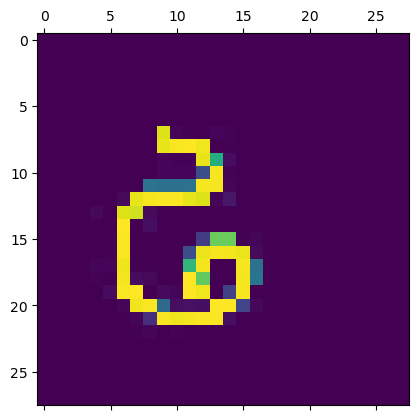

In [15]:
sbrain.nnet[char_id].show_receptive_field_id(55)

In [51]:
sbrain.nnet[char_id].nrn_tls.get_neuron_from_id(58)

{'_id': 58,
 'schema_version': 2,
 'type': 'sentive_vision_curve',
 'layer_id': 2,
 'DbConnectivity': {'pre_synaptique': [57, 60],
  'post_synaptique': [],
  'lateral_connexion': [],
  'anti_lateral': [],
  'anti_post_synaptique': [59],
  'weights': {}},
 'meta': {'threshold': 0.7,
  'pending_nb_iteration': 3,
  'averaged_prediction': 0.0,
  'last_vector': {'x': 0.0, 'y': 0.0},
  'curve': {'starting_point': {'x': 9, 'y': 7},
   'basis_vector': {'x': 0.45186753025706683, 'y': 0.9112835401779334},
   'last_position': {'x': 0.0, 'y': 0.0},
   'nb_iteration': 2,
   'angle': -1.1104675434547855,
   'acceleration': 0.0,
   'malm_angle': 0.0,
   'malm_acceleration': 0.0,
   'pixels_matrix': [{'x': 9, 'y': 7}, {'x': 10, 'y': 8}],
   'last_vector': {'x': 1.0, 'y': 0.0},
   'cg': {'x': 9.5, 'y': 7.5},
   'offset_cg': {'x': -1.1785714285714288, 'y': -7.5892857142857135}},
  'pixels_matrix': [{'x': 9, 'y': 7}, {'x': 10, 'y': 8}]}}

In [52]:
sbrain.nnet[char_id].nrn_tls.get_neuron_from_id(62)

{'_id': 62,
 'schema_version': 2,
 'type': 'sentive_vision_curve',
 'layer_id': 2,
 'DbConnectivity': {'pre_synaptique': [61, 64, 65, 66, 67, 70, 71, 72, 73],
  'post_synaptique': [],
  'lateral_connexion': [75],
  'anti_lateral': [],
  'anti_post_synaptique': [63, 69],
  'weights': {}},
 'meta': {'threshold': 0.7,
  'pending_nb_iteration': 5,
  'averaged_prediction': 0.0,
  'last_vector': {'x': 0.0, 'y': 0.0},
  'curve': {'starting_point': {'x': 11, 'y': 8},
   'basis_vector': {'x': 0.7265811211402047, 'y': 0.6870806898775742},
   'last_position': {'x': 9, 'y': 12},
   'nb_iteration': 9,
   'angle': 0.4295161186360927,
   'acceleration': -2.2701239672769e-10,
   'malm_angle': 0.0,
   'malm_acceleration': 0.0,
   'pixels_matrix': array([{'x': 11, 'y': 8}, {'x': 12, 'y': 8}, {'x': 13, 'y': 9},
          {'x': 13, 'y': 10}, {'x': 13, 'y': 11}, {'x': 12, 'y': 12},
          {'x': 11, 'y': 12}, {'x': 10, 'y': 12}, {'x': 9, 'y': 12}],
         dtype=object),
   'last_vector': {'x': 0.395420

In [18]:
start = {
    "x": 24,
    "y": 2
}
b_v = {
    "x": 0,
    "y": 1
}
angl = 0.12306477575714833
acc = -0.12306477575714833/6.645
n = 17
ck_pts = []
ck_pts.append({
    "x" : 20,
    "y" : 12
})
ck_pts.append({
    "x" : 20,
    "y" : 13
})
ck_pts.append({
    "x" : 20,
    "y" : 18
})

print(sbrain.nnet[char_id].nrn_tls.check_curve_geometry(start, b_v, angl, acc, n, ck_pts))

[0.47068050626773655, 0.21485760114570812, 0.12788242233031416]


**nrn_drawer** : position de départ x 24 y 2
**nrn_drawer** : position intermédiaire x 24 y 4
**nrn_drawer** : position intermédiaire x 24 y 5
**nrn_drawer** : position intermédiaire x 23 y 6
**nrn_drawer** : position intermédiaire x 23 y 7
**nrn_drawer** : position intermédiaire x 23 y 8
**nrn_drawer** : position intermédiaire x 22 y 9
**nrn_drawer** : position intermédiaire x 22 y 10
**nrn_drawer** : position intermédiaire x 21 y 10
**nrn_drawer** : position intermédiaire x 21 y 11
**nrn_drawer** : position intermédiaire x 20 y 12
**nrn_drawer** : position intermédiaire x 20 y 13
**nrn_drawer** : position intermédiaire x 20 y 14
**nrn_drawer** : position intermédiaire x 20 y 15
**nrn_drawer** : position intermédiaire x 20 y 16
**nrn_drawer** : position intermédiaire x 20 y 17
**nrn_drawer** : position intermédiaire x 20 y 18
**nrn_drawer** : angle final: -0.17823041677591098
**nrn_drawer** : position finale x 20 y 18
**nrn_drawer** : dernier vector {'x': 0.28660140019995617, 'y': 0.9

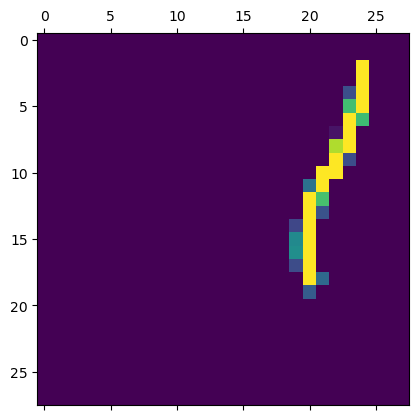

In [19]:
# {'x': 0.0, 'y': 1.0} 0.12306477575714833 -0.018830949533316203
mtrx = np.zeros([28,28])
vector_1= {
    "x" : 0, 
    "y" : 1
}
angle =  0.12306477575714833
acc =  -0.018830949533316203
length = 17
start= {
    "x" : 24,
    "y" : 2
}

mtrx, angle, start, vector_1, _ = sbrain.nnet[0].nrn_tls.nrn_drawer(mtrx, vector_1, angle, length, start,acc)
plt.matshow(mtrx)

**nrn_drawer** : position de départ x 24 y 2
**nrn_drawer** : position intermédiaire x 23 y 4
**nrn_drawer** : position intermédiaire x 23 y 5
**nrn_drawer** : position intermédiaire x 23 y 6
**nrn_drawer** : position intermédiaire x 22 y 7
**nrn_drawer** : position intermédiaire x 21 y 7
**nrn_drawer** : position intermédiaire x 21 y 8
**nrn_drawer** : position intermédiaire x 20 y 9
**nrn_drawer** : position intermédiaire x 20 y 10
**nrn_drawer** : position intermédiaire x 19 y 10
**nrn_drawer** : position intermédiaire x 18 y 11
**nrn_drawer** : position intermédiaire x 18 y 12
**nrn_drawer** : position intermédiaire x 17 y 13
**nrn_drawer** : position intermédiaire x 16 y 14
**nrn_drawer** : position intermédiaire x 16 y 14
**nrn_drawer** : position intermédiaire x 15 y 15
**nrn_drawer** : position intermédiaire x 15 y 16
**nrn_drawer** : angle final: -0.08642183409265544
**nrn_drawer** : position finale x 15 y 16
**nrn_drawer** : dernier vector {'x': -0.4105081879698569, 'y': 0.91

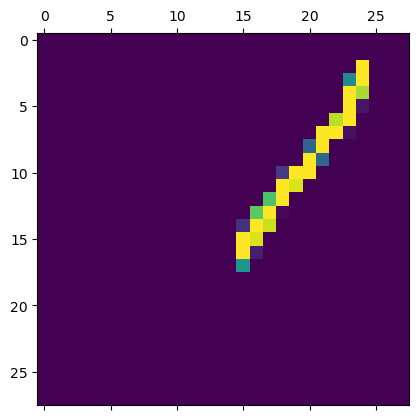

In [20]:
# {'x': -0.23447334734878916, 'y': 0.97212254854162} 0.0981762684527942 -0.021492143625680006
# {'x': -0.23447334734878916, 'y': 0.97212254854162} 0.055060023299547595 -0.011537381409090601
mtrx = np.zeros([28,28])
vector_1= {
    "x" : -0.23447334734878916, 
    "y" : 0.97212254854162
}
angle =  0.0981762684527942
acc =  -0.011537381409090601
length = 17
start= {
    "x" : 24,
    "y" : 2
}

mtrx, angle, start, vector_1, _ = sbrain.nnet[0].nrn_tls.nrn_drawer(mtrx, vector_1, angle, length, start,acc)
plt.matshow(mtrx)

In [21]:
x = -0.9559481185106888
y = -1.0421915345635244
k = np.sqrt(np.power(x,2)+np.power(y,2))

print("norme du vecteur", k)
print("normalisation du vecteur")
print("x",x/k)
print("y",y/k)
print("Allongement de la norme à sqrt2")
print("x",np.sqrt(2)*x/k)
print("y",np.sqrt(2)*y/k)

norme du vecteur 1.4142135623730951
normalisation du vecteur
x -0.6759573970614294
y -0.7369407013850822
Allongement de la norme à sqrt2
x -0.955948118510689
y -1.0421915345635244


**nrn_drawer** : position de départ x 9 y 7
**nrn_drawer** : position intermédiaire x 11 y 7
**nrn_drawer** : position intermédiaire x 12 y 8
**nrn_drawer** : position intermédiaire x 12 y 9
**nrn_drawer** : position intermédiaire x 12 y 10
**nrn_drawer** : position intermédiaire x 12 y 11
**nrn_drawer** : position intermédiaire x 11 y 12
**nrn_drawer** : position intermédiaire x 10 y 12
**nrn_drawer** : position intermédiaire x 9 y 12
**nrn_drawer** : position intermédiaire x 8 y 12
**nrn_drawer** : position intermédiaire x 7 y 11
**nrn_drawer** : position intermédiaire x 7 y 10
**nrn_drawer** : position intermédiaire x 7 y 9
**nrn_drawer** : position intermédiaire x 7 y 8
**nrn_drawer** : angle final: 0.39
**nrn_drawer** : position finale x 7 y 8
**nrn_drawer** : dernier vector {'x': 0.3500373909938908, 'y': -0.9367357284240797}


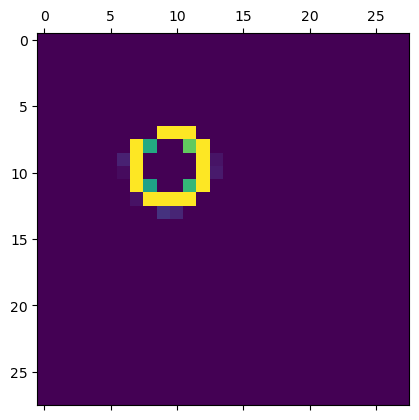

In [22]:
mtrx = np.zeros([28,28])
vector_1= {
    "x" : 1,
    "y" : 0
}
angle = 0.78/2
acc =  0
length = 14
start= {
    "x" : 9,
    "y" : 7
}

mtrx, angle, start, vector_1, _ = sbrain.nnet[0].nrn_tls.nrn_drawer(mtrx, vector_1, angle, length, start,acc)
plt.matshow(mtrx)

In [23]:
45/9

5.0

In [24]:
def compare_matrices(desired_mtrx, mtrx):
    if desired_mtrx.shape != mtrx.shape:
        raise ValueError("Les deux matrices n'ont pas la même forme")
    
    corr_matrix = np.corrcoef(desired_mtrx.flatten(), mtrx.flatten())
    similarity_score = np.abs(corr_matrix[0, 1]).mean()
    print(corr_matrix[0, 1])
    
    return similarity_score

In [25]:
def find_line(x1, y1, x2, y2):
    if x1 == x2:
        return (None, x1)
    elif y1 == y2:
        return (0, y1)
    else:
        a = (y2 - y1) / (x2 - x1)
        b = y1 - a * x1
        return (a, b)


def dot_on_line(x, y, a, b):
    return y == a * x + b

**nrn_drawer** : position de départ x 9 y 7
**nrn_drawer** : position intermédiaire x 11 y 9
**nrn_drawer** : position intermédiaire x 12 y 10
**nrn_drawer** : position intermédiaire x 13 y 11
**nrn_drawer** : position intermédiaire x 14 y 12
**nrn_drawer** : position intermédiaire x 15 y 13
**nrn_drawer** : position intermédiaire x 16 y 14
**nrn_drawer** : position intermédiaire x 17 y 15
**nrn_drawer** : angle final: 0
**nrn_drawer** : position finale x 17 y 15
**nrn_drawer** : dernier vector {'x': 1.0, 'y': 1.0}
save_pos [(10, 8), (12, 10), (11, 9), (15, 13), (17, 15), (14, 12), (16, 14), (9, 7), (13, 11)]


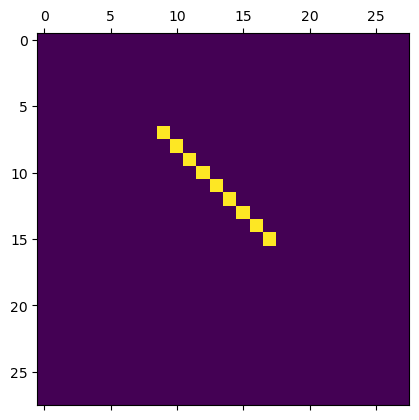

In [26]:
mtrx = np.zeros([28,28])
vector_1= {
    "x" : 1,
    "y" : 1
}
angle = 0
length = 8
start= {
    "x" : 9,
    "y" : 7
}
acc = 0

mtrx, angle, start, vector_1, save_pos = sbrain.nnet[0].nrn_tls.nrn_drawer(mtrx, vector_1, angle, length, start,acc)
plt.matshow(mtrx)
print("save_pos", save_pos)

In [27]:
sbrain.nnet[0].show_receptive_field_id(83)

KeyError: 'meta'

In [ ]:
X = []
Y = []
u_x = []
u_y = []
nb = 0
for nrn in sbrain.nnet[0].nrn_tls.lst_nrns:
    if nrn.neuron["layer_id"] == 2:
        nrn2 = nrn.neuron
        nb += 1
        X.append(nrn2["meta"]["glbl_prm"]["cg"]["x"])
        Y.append(nrn2["meta"]["glbl_prm"]["cg"]["y"])
        u_x.append(nrn2["meta"]["glbl_prm"]["u_axis"]["x"])
        u_y.append(nrn2["meta"]["glbl_prm"]["u_axis"]["y"])
q = plt.quiver(X,Y,u_x,u_y)
for nrn in sbrain.nnet[0].nrn_tls.lst_nrns:
    if nrn.neuron["layer_id"] == 2:
        nrn2 = nrn.neuron
        x = nrn2["meta"]["glbl_prm"]["cg"]["x"]
        y = nrn2["meta"]["glbl_prm"]["cg"]["y"]
        plt.text(x,y, str(nrn2["_id"]))
        for key in nrn2["DbConnectivity"]['angles']:
            y += 0.5
            angle = nrn2["DbConnectivity"]['angles'][key]
            angle = np.abs(angle)
            if angle > (np.pi)/2:
                angle = np.pi - angle
            if angle ==0:
                color = "green"
            elif angle < 0.1:
                color = "yellow"
            elif angle < 0.4:
                color = "orange"
            elif angle < 0.8:
                color = "red"
            else :
                color = "purple"
            plt.text(x,y, str(key),color=color)
            
print(nb)

KeyError: 'glbl_prm'

In [ ]:
angles = []
for nrn in sbrain.nnet[0].nrn_tls.lst_nrns:
    if nrn.neuron["layer_id"] == 2:
        nrn2 = nrn.neuron
        for angle in nrn2["DbConnectivity"]['angles'].values():
            angle = np.abs(angle)
            if angle > (np.pi)/2:
                angle = np.pi - angle
            angles.append(angle)
            
plt.hist(angles)

In [ ]:
def generate_comment(text):
    """
    Generates a formatted comment string.
    
    Parameters
    ----------
    text : str
        The text to be used in the comment.
    
    Returns
    -------
    str
        The formatted comment string.
    """
    comment = "".join(["* " + line for line in text.splitlines()])
    return "/**\n" + comment + "\n*/"


In [ ]:
generate_comment("This is a test")


'/**\n* This is a test\n*/'

In [ ]:
np.diff([0.46364760900080615, 0.0, 0.5563215839986531, 0.4331511312763392, 1.04497122052071, -0.4189906125041946, -0.36640755089325333, 0.0, 0.32175055439664196, 0.46364760900080565, 0.4189906125041958, 0.36640755089325294, 0.0, 0.0, 0.3217505543966417, 0.46364760900080615, 0.16964630722702223, 0.12435499454676169, 0.49139686162366436, 0.0, 0.32175055439664196, -1.10714871779409, 1.4781223517970488, 0.3866752767716308])


In [ ]:
plt.plot([-0.46364761,  0.55632158, -0.12317045,  0.61182009, -1.46396183,
        0.05258306,  0.36640755,  0.32175055,  0.14189705, -0.044657  ,
       -0.05258306, -0.36640755,  0.        ,  0.32175055,  0.14189705,
       -0.2940013 , -0.04529131,  0.36704187, -0.49139686,  0.32175055,
       -1.42889927,  2.58527107, -1.09144708])

In [ ]:
# Affiche un un graphique d'une matrice de données
def plot_matrix(point_data, mat_dim=(28, 28)):
    """
    Plots a matrix of data.
    
    Parameters
    ----------
    matrix : list
        The matrix of data to be plotted.
    mat_dim : tuple
        The dimensions of the matrix.
    """
    # Create an empty matrix of zeros of mat_dim dimensions
    matrix = np.zeros(mat_dim)
    # For each element in the matrix
    for point in point_data:
        # Set the value of the element to the value of the matrix
        matrix[point[1]][point[0]] +=1
    # Plot the matrix   
    plt.imshow(np.array(matrix).reshape(mat_dim), cmap='gray')
    plt.show()
plot_matrix([(11, 8), (9, 7), (9, 8), (10, 8)])

In [ ]:
# nrn3:96
plot_matrix([(11, 8), (12, 8), (10, 8), (12, 9)])

In [ ]:
# nrn3:97
plot_matrix([(11, 8), (13, 10), (12, 8), (12, 9)])

In [ ]:
#nrn3:98
plot_matrix([(12, 11), (13, 10), (13, 11), (12, 9)])


In [ ]:
# nrn3:99
plot_matrix([(13, 10), (11, 12), (12, 12), (12, 11), (13, 11)])

In [ ]:
sbrain.nnet[0].nrn_tls.get_neuron_from_id(99)

In [ ]:
sbrain.nnet[0].nrn_tls.calc_angle({'x': 0.9899494936611662, 'y': -0.14142135623730961},{"x":0, "y":1} )

In [ ]:
sbrain.nnet[0].nrn_tls.calc_angle({"x":0, "y":1}, {'x': 1, 'y': -0.3} )